# Gathering Data:
First step of the data wrangling process goes here. At this point I have no data in the notebook whatsoever. Some files are in the directory open in the kernal and I will just load them into a DataFrame. Others I will still need to download them programatically in this section of the notebook.
There! The fun begins!

In [1]:
# import libraries to be used
import numpy as np
import pandas as pd
import requests
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


Now that all libraries are ready, I will proceed by loading each dataframe then checking it is loaded correctly one by one.

In [2]:
# load local file
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# exploring the data and getting a feeling for the frame
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# load json file on web
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# save downloaded content to file
images_file_name = 'image_predications.tsv'
with open(images_file_name, 'wb') as file:
    file.write(r.content)

# load created file for image predicaitons
df_images = pd.read_csv(images_file_name, sep='\t')


In [7]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The following code I have taken from course files', as I had problems obtaining a developer account.

I have only edited to:
1. leave imports in the very first cell.
2. report errors in a log file rather than in screen.
3. suit the rest of variable names. (line 19: df_tweets)

***Running the following cell will take much time (20-30 minutes to run because of Twitter's rate limit), so no need to do so unnecessaarily.***

***Please provide the necessary keys for it to run properly, if you did not, the rest of the code can bypass the collected folder if it has many curropt data pieces, and will work with the downloaded one.***

In [9]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('recent_tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[str(tweet_id)] = e
            pass
end = timer()
print(end - start)


357.10150189900014


In [10]:
# writing all error messages in tweet id message text pairs:
try:
    writable_fails_dict = {k : fails_dict[k].response.text[len('{"errors":['):-len(']}')]+'\n' for k in fails_dict.keys()}
    with open('twitter_api_log_file.txt', 'w') as file:
        file.write(json.dumps(writable_fails_dict))
except NameError as e:
    print('No errors to report in the log file.', str(e).title())

In [11]:
# picking which file to use (the recently downloaded from twitter_api, or the one on the instrcution page already)

# making 'tweet-json.txt' the initial file
tweets_file_name = 'tweet_json.txt'
file_length = -1

# calculating length and choose longer (supposedly both are valid files and the data is not corrupt in any):
with open('tweet_json.txt', 'r') as file:
    file_length = len(file.readlines())  
with open('recent_tweet_json.txt', 'r') as file:
    if len(file.readlines()) >= file_length:
        tweets_file_name = 'tweet_json.txt'
        
# priting out the available properties to pick from them:
with open(tweets_file_name, 'r') as file:
    print(json.loads(file.readline()).keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [12]:
# loading tweet.json files to then load into a dataframe
df_dict = {'id':[], 'retweet_count':[], 'favorite_count':[], 'favorited':[], 'retweeted':[], 'geo':[], 'lang':[]}
with open(tweets_file_name, 'r') as file:
    lines = file.readlines()
    for line in lines:
        for key in df_dict.keys():
            df_dict[key].append(json.loads(line)[key])
df_tweets_augment = pd.DataFrame(df_dict)

In [13]:
df_tweets_augment.head()

,id,retweet_count,favorite_count,favorited,retweeted,geo,lang
0,892420643555336193,8853,39467,False,False,None,en
1,892177421306343426,6514,33819,False,False,None,en
2,891815181378084864,4328,25461,False,False,None,en
3,891689557279858688,8964,42908,False,False,None,en
4,891327558926688256,9774,41048,False,False,None,en


In [14]:
df_tweets_augment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
favorited         2354 non-null bool
retweeted         2354 non-null bool
geo               0 non-null object
lang              2354 non-null object
dtypes: bool(2), int64(3), object(2)
memory usage: 96.6+ KB


# Phweeooh! :"D
Now that we are done with the first step of data gathering and we have three main dataframes to work with:
1. `df_tweets`.
1. `df_tweets_augment`
2. `df_images`.

We proceed to the next step of data assessment.

# Assessment (checkpoint 0)
Before I start, I know there is a quality issue that needs to be resolved before we proceed any further: 
*  the `df_tweets_augment` and `df_tweets` both contain data about the same *observational unit* namely 'tweets'.
And with this problem we have our first item in our **tidiness** problems.

Secondly, from initial review of imported dataframes I have few issues I suspect about the data. So I will go for them one by one before invistigating further.
Those issues are:
1. `['doggo', 'floofer','pupper', 'puppo']` seem to be a list of values rather than variable names.
1. Make the variable created from aggregating `['doggo', 'floofer','pupper', 'puppo']` a `'category'`.
1. The `df_images` has predictions about images in tweets in `df_tweets`. So relevant pieces of information need to be merged.
1. `timestamp` and `retweeted_status_timestamp` in `df_tweets` is not formatted as `datetime`.
1. All `id`'s: `['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id']`  in `df_tweets` are should have the same `dtype`.

In [15]:
df_tweets['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
df_tweets['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
df_tweets['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
df_tweets['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

And in fact these result confirm the suspession we began with. `['doggo', 'floofer','pupper', 'puppo']` ***is*** a list of values rather than variable names.

And on to visual assessment of a random sample of each table to get more intimate with the data before getting to explore programatically.

In [19]:
df_tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1034,745057283344719872,NaN,NaN,2016-06-21 00:54:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,None,None,None,None
998,748307329658011649,NaN,NaN,2016-06-30 00:09:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This sherk must've leapt out of the water and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748307329...,7,10,None,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None
719,783391753726550016,NaN,NaN,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,None,None,None,None
173,858471635011153920,NaN,NaN,2017-04-30 00:02:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
975,750041628174217216,NaN,NaN,2016-07-04 19:00:33 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Beau. He's trying to keep his daddy fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750041628...,13,10,Beau,None,None,None,None
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
550,804738756058218496,NaN,NaN,2016-12-02 17:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804738756...,12,10,Django,None,None,None,None


In [20]:
df_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
607,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
366,672902681409806336,https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg,1,ram,0.374466,False,bighorn,0.159621,False,Arabian_camel,0.111919,False
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
1303,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland_sheepdog,0.018142,True
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
670,683098815881154561,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1,golden_retriever,0.889848,True,kuvasz,0.053008,True,Labrador_retriever,0.037881,True
610,680100725817409536,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,1,golden_retriever,0.698961,True,chow,0.145971,True,Pomeranian,0.034888,True


In [21]:
df_tweets_augment.sample(10)

,id,retweet_count,favorite_count,favorited,retweeted,geo,lang
86,875144289856114688,5081,22185,False,False,None,en
1616,684969860808454144,421,2374,False,False,None,en
1201,716285507865542656,1225,3041,False,False,None,en
969,750101899009982464,959,3344,False,False,None,en
1921,674082852460433408,186,804,False,False,None,en
2294,667090893657276420,132,349,False,False,None,en
694,786709082849828864,7069,20296,False,False,None,en
1561,688179443353796608,669,2328,False,False,None,en
1263,709901256215666688,112,732,False,False,None,en
271,840761248237133825,1972,0,False,False,None,en


# Assessment (checkpoint 1)

Now we can start creating two list aggreated by issue types.

### Quality problems:
1. `timestamp` in `df_tweets` is not formatted as `datetime`.
1. All `id`'s: `['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id']`  in `df_tweets` are should have the same `dtype`.

### Structure problems:
1. the `df_tweets_augment` and `df_tweets` both contain data about the same observational unit. **(merge the two dataframes)**
1. The `df_images` has predictions about images in tweets in `df_tweets`. So they are the same observational unit (tweets). **(Merge the relevant pieces in `df_images` to `df_tweets`)**
1. `['doggo', 'floofer','pupper', 'puppo']` seem to be a list of values rather than variable names.

Proceeding with the assessment:

In [22]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_tweets.rating_denominator.value_counts().sort_index() # used to sort the series by its indices rather than values

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

So this marks another *data quality* issue. One can ***not*** divide by zero.

In [24]:
inspect = df_tweets.text[df_tweets.rating_denominator == 0] 
print(inspect[inspect.index[0]])
print(df_tweets.rating_numerator[df_tweets.rating_denominator == 0])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
313    960
Name: rating_numerator, dtype: int64


They seem to have been correcting for someone, so we need to correct this to `13/10`.

In [25]:
df_tweets.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

Although one can give a rating of zero, but this is suspicious behaviour for this account that needs to be invisitgated further. As well as the very high value of 1776. And other high values.

In [26]:
for line in df_tweets.text[df_tweets.rating_numerator == 0]:
    print(line)

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


So in fact these are ***not*** dogs rating. The first one is rating of a stolen tweet. The second is a situational rating. (please click and see for yourself)

So the first of them is also a *quality issue*. Rating of not a dog.

In [27]:
#worked my way in this  cell, from 1776 all the way till I found another mistake in ratings.
for line in df_tweets.text[df_tweets.rating_numerator == 50]:
    print(line)

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


So in fact these are ***not*** dogs rating, as well, and is just *'an expression'*.


Now we proceed to check the rest of the entries in `df_tweeets` and `df_tweets_augment`.

In [28]:
df_tweets.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Daisy           7
Buddy           7
an              7
Toby            7
Bailey          7
Dave            6
Leo             6
Rusty           6
Jax             6
Oscar           6
Jack            6
Scout           6
Milo            6
Bella           6
Stanley         6
Koda            6
Oakley          5
             ... 
Akumi           1
Moofasa         1
Evy             1
Steve           1
Travis          1
Monkey          1
Billy           1
DayZ            1
Kathmandu       1
Brady           1
Callie          1
Koko            1
Spark           1
Jomathan        1
Dook            1
Lance           1
Edmund          1
Julio           1
Ricky           1
Meera           1
Snicku          1
Kulet           1
Shikha          1
Jett            1
Nugget    

Here we have two problems:
1. NA values are not identified as so, but rather are strings of 'None' value.
1. 'a' as a name? two short. Yet, it needs further invistigation.

In [29]:
for line in df_tweets.text[df_tweets.name == 'a']:
    print(line)

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

And actually there is no dog names in there, as can be inferred by visual inspection.
So, `'a'` as a dog name is an erronous value.

Now on to the `df_tweet_augment` dataframe:

In [30]:
df_tweets_augment.favorited.sum()

8

In [31]:
df_tweets_augment[df_tweets_augment.favorited]

,id,retweet_count,favorite_count,favorited,retweeted,geo,lang
21,887517139158093824,12082,46959,True,False,None,en
61,880095782870896641,4533,28150,True,False,None,en
63,879674319642796034,10,315,True,False,None,en
454,818307523543449600,9366,0,True,False,None,en
471,816450570814898180,9366,33961,True,False,None,en
588,799308762079035393,6478,0,True,False,None,en
787,774314403806253056,6478,24167,True,False,None,en
1005,747600769478692864,619,2545,True,False,None,en


Does not seem to have any problems perse, but very curious observation that they have favourited 8, or *only* 8, of their own tweets. Something I guess to disply in a later section.

In [32]:
df_tweets_augment.retweeted.sum()

0

Wow! Those guys are seriously busy! Once it's out it's out. :")

In [33]:
df_tweets_augment.geo.unique()

array([None], dtype=object)

This means that no additional informaiton is obtained by keeping `geo` column.
So, it needs to be *dropped*. 

In [34]:
df_tweets_augment.lang.value_counts()

en     2336
und       7
in        3
nl        3
es        1
ro        1
eu        1
tl        1
et        1
Name: lang, dtype: int64

Perfectly fine results. Maybe just suggests that they need to invest more effort if they target an interational audience.

# Assessment (checkpoint 2)

Now we can aggregate even more errors from the past assessment tour. And in total, all we have is listed in here.

### Quality problems:
1. `timestamp` and `retweeted_status_timestamp` in `df_tweets` is not formatted as `datetime`.
1. All `id`'s: `['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id']`  in `df_tweets` are should have the same `dtype`.
1. Zero `rating_denominator` not allowed. In fact it was a correction. **(Correct the rating values)**
1. Zero `rating_numerator` was not of a dog. **(Drop entry)**
1. *50/50 split* mistaken for a rating. **(Change)**
1. `Na` values in `df_tweets.name` has value `None` instead. **(Change to `Na`)**
1. `'a'` is not a name. **(Change to `Na`)**
1. `geo` column in `df_tweets_augment` has no values. **(Drop column)**

### Structure problems:
1. The `df_tweets_augment` and `df_tweets` both contain data about the same observational unit. **(Merge the two dataframes)**
1. The `df_images` has predictions about images in tweets in `df_tweets`. So they are the same observational unit (tweets). **(Merge the relevant pieces in `df_images` to `df_tweets`)**
1. In `df_tweets` the columns:`['doggo', 'floofer','pupper', 'puppo']` form a list of values rather than variable names. **(`melt` within the frame)**

Finally we proceed to assessing the `df_images` dataframe.

In [35]:
df_images.img_num.value_counts().sort_index()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [36]:
df_images.p1.value_counts().sort_values()

lorikeet                       1
washer                         1
handkerchief                   1
three-toed_sloth               1
fountain                       1
grey_fox                       1
bookshop                       1
radio_telescope                1
bookcase                       1
clog                           1
fiddler_crab                   1
earthstar                      1
carousel                       1
scorpion                       1
cowboy_boot                    1
coral_reef                     1
syringe                        1
giant_panda                    1
shopping_basket                1
flamingo                       1
bald_eagle                     1
hay                            1
rain_barrel                    1
electric_fan                   1
bannister                      1
coil                           1
conch                          1
bighorn                        1
wild_boar                      1
banana                         1
          

In [37]:
df_images.p1[df_images.p1_dog].value_counts().sort_values()

standard_schnauzer               1
clumber                          1
silky_terrier                    1
Japanese_spaniel                 1
Scotch_terrier                   1
EntleBucher                      1
groenendael                      1
Sussex_spaniel                   2
Appenzeller                      2
wire-haired_fox_terrier          2
toy_terrier                      2
black-and-tan_coonhound          2
Australian_terrier               2
Greater_Swiss_Mountain_dog       3
Welsh_springer_spaniel           3
komondor                         3
giant_schnauzer                  3
Brabancon_griffon                3
Irish_water_spaniel              3
cairn                            3
curly-coated_retriever           3
briard                           3
Ibizan_hound                     3
Leonberg                         3
Scottish_deerhound               3
Rhodesian_ridgeback              4
keeshond                         4
bluetick                         4
miniature_schnauzer 

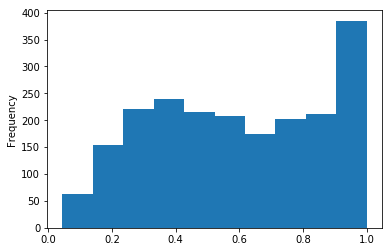

In [107]:
df_images.p1_conf.plot(kind='hist');

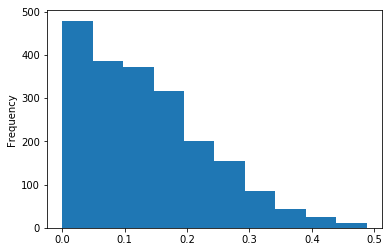

In [39]:
df_images.p2_conf.plot(kind='hist');

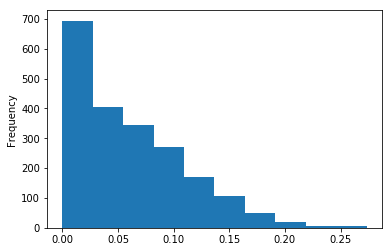

In [40]:
df_images.p3_conf.plot(kind='hist');

# Assessment (checkpoint 3)

So this warps up the assessment step. `df_images` looks very fine dataframe, at least for my untrained eye. So this leaves the issues as they were after the last assessment step.


### Quality problems:
1. `timestamp` and `retweeted_status_timestamp` in `df_tweets` is not formatted as `datetime`.
1. all `id`'s: `['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id']`  in `df_tweets` are should have the same `dtype`.
1. Zero `rating_denominator` not allowed. In fact it was a correction. **(Correct the rating values)**
1. Zero `rating_numerator` was not of a dog. **(Drop entry)**
1. *50/50 split* mistaken for a rating. **(Change)**
1. `Na` values in `df_tweets.name` has value `'None'` instead. **(Change to `Na`)**
1. `'a'` is not a name. **(Change to `Na`)**
1. `geo` column in `df_tweets_augment` has no values. **(Drop column)**
1. make the variable created from aggregating `['doggo', 'floofer','pupper', 'puppo']` a `'category'`.

### Structure problems:
1. The `df_tweets_augment` and `df_tweets` both contain data about the same observational unit. **(Merge the two dataframes)**
1. The `df_images` has predictions about images in tweets in `df_tweets`. So they are the same observational unit (tweets). **(Merge the relevant pieces in `df_images` to `df_tweets`)**
1. In `df_tweets` the columns:`['doggo', 'floofer','pupper', 'puppo']` form a list of values rather than variable names. **(`melt` within the frame)**

Finally we proceed to assessing the `df_images` dataframe.

# Creating backup:

I will create a backup of original data before getting into cleaning the data, in case any misfortune occurs.

I will also update this backup with cleaned data periodically after several steps of cleaning.

In [41]:
# to define backup's files in the global namespace first
df_tweets_backup = df_tweets.copy()
df_images_backup = df_images.copy()
df_tweets_augment_backup = df_tweets_augment.copy()

# for later calls
def update_backup():
    global df_tweets_backup, df_images_backup, df_tweets_augment_backup
    df_tweets_backup = df_tweets.copy()
    df_images_backup = df_images.copy()
    df_tweets_augment_backup = df_tweets_augment.copy()

This might come in handy too:

In [42]:
def retreive_last_backup():
    global df_tweets, df_images, df_tweets_augment
    df_tweets = df_tweets_backup.copy()
    df_images = df_images_backup.copy()
    df_tweets_augment = df_tweets_augment_backup.copy()

# Cleaning Data:

Now time to transfer the issues found during assessment into changes, and to iterate through:
1. ***Define.***
1. ***Code.***
1. ***Test.*** 

### Define: 

1. **Change `id` column label in `df_tweets_augment` into `tweet_id` to match `df_tweets`.**
2. **Merge `df_tweets_augment` and `df_tweets`.**

### Code:

In [43]:
df_tweets_augment.rename(columns={'id':'tweet_id'}, inplace=True)

In [44]:
df_tweets = pd.merge(df_tweets, df_tweets_augment, on='tweet_id')

### Test: 

In [45]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,retweet_count,favorite_count,favorited,retweeted,geo,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,None,None,8853,39467,False,False,None,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,None,None,6514,33819,False,False,None,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,None,None,4328,25461,False,False,None,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,None,None,8964,42908,False,False,None,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,None,9774,41048,False,False,None,en
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,3261,20562,False,False,None,en
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,None,None,None,None,2158,12041,False,False,None,en
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,None,None,None,None,16716,56848,False,False,None,en
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,None,None,None,None,4429,28226,False,False,None,en
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,doggo,None,None,None,7711,32467,False,False,None,en


### Define:
1. **Drop column `geo` in `df_tweets`.**

### Code:

In [46]:
df_tweets.drop(columns=['geo'], inplace=True)

### Test:

In [47]:
df_tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,8853,39467,False,False,en


In [48]:
df_tweets.shape

(2354, 22)

### Define:

1. Change `dtype` of each of `timestamp` and `retweeted_status_timestamp` in `df_tweets` to `datetime`.


### Code:

In [49]:
df_tweets.timestamp = pd.to_datetime(df_tweets.timestamp)
df_tweets.retweeted_status_timestamp = pd.to_datetime(df_tweets.retweeted_status_timestamp)

### Test:

In [50]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null datetime64[ns]
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
retweet_count   

In [51]:
df_tweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,8853,39467,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,6514,33819,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,4328,25461,False,False,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,8964,42908,False,False,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,9774,41048,False,False,en


### Define:

1. Make `['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id']`  in `df_tweets` are should have the same `dtype`. Either `int` or `str`.

### Code:

In [52]:
for col in df_tweets:
    if 'id' in col:
        df_tweets[col] = df_tweets[col].astype('str').replace({'None' : None, 'nan' : None})

### Test:

In [53]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
tweet_id                      2354 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2354 non-null datetime64[ns]
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null object
retweeted_status_user_id      179 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
retweet_count      

In [54]:
df_tweets.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,NaT,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,8853,39467,False,False,en
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,6514,33819,False,False,en
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,NaT,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,4328,25461,False,False,en
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,NaT,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,8964,42908,False,False,en
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,NaT,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,9774,41048,False,False,en
5,891087950875897856,None,None,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,NaT,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,None,3261,20562,False,False,en
6,890971913173991426,None,None,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Jax,None,None,None,None,2158,12041,False,False,en
7,890729181411237888,None,None,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,NaT,https://twitter.com/dog_rates/status/890729181...,...,None,None,None,None,None,16716,56848,False,False,en
8,890609185150312448,None,None,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,NaT,https://twitter.com/dog_rates/status/890609185...,...,Zoey,None,None,None,None,4429,28226,False,False,en
9,890240255349198849,None,None,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,NaT,https://twitter.com/dog_rates/status/890240255...,...,Cassie,doggo,None,None,None,7711,32467,False,False,en


### Define:

1. **Change `'None'` values in `df_tweets.name` to `None`.**
1. **Change `'a'` in `df_tweets.name`  to `None`. Except for texts that state other name.**

### Code:

In [55]:
df_tweets.name.replace({'None':None},inplace=True)

### Test:

In [56]:
df_tweets.name.value_counts().sort_values()

Darrel         1
Clifford       1
Millie         1
Jackie         1
Dot            1
Chase          1
Flash          1
Kobe           1
Sprinkles      1
Augie          1
Stuart         1
Iggy           1
Traviss        1
Dutch          1
Erik           1
Christoper     1
Yoda           1
Gert           1
Jazz           1
Laika          1
Godzilla       1
Shelby         1
Nigel          1
Jim            1
Furzey         1
Coopson        1
space          1
Sandra         1
Ralphson       1
Barry          1
              ..
very           5
Larry          5
Oscar          6
Scout          6
Koda           6
Bella          6
Dave           6
Leo            6
Milo           6
Jack           6
Jax            6
Stanley        6
Rusty          6
an             7
Buddy          7
Toby           7
Daisy          7
Bailey         7
Sadie          8
the            8
Bo             9
Winston        9
Tucker        10
Lola          10
Penny         10
Cooper        11
Lucy          11
Oliver        

### Code:

In [57]:
# identifying a substring to take as the new name. It is always found after 'named'.
take_from = df_tweets.text[df_tweets.name == 'a'].str.find('named')
texts = df_tweets.text[df_tweets.name == 'a'].copy()
take_to = take_from.copy()
for i in take_from.index:
    if take_from[i] > 0:
        take_to[i] = texts[i].find('.', take_from[i])
        df_tweets.name[i] = texts[i][take_from[i]+len('named'):take_to[i]]
        
# now eleminate all erroneous 'a's that has no substitute.
df_tweets.name.replace({'a': None}, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test:

In [58]:
for i in texts.index:
    if take_from[i] > 0:
        print(texts[i][take_from[i]+len('named'):take_to[i]])

 Wylie
 Kip
 Jacob (Yacōb)
 Rufus
 Spork
 Cherokee
 Hemry
 Alphred
 Alfredo
 Leroi
 Chuk
 Alfonso
 Cheryl
 Jessiga
 Klint
 Kohl
 Pepe
 Octaviath
 Johm


In [59]:
df_tweets.name.value_counts().sort_index()

 Alfonso          1
 Alfredo          1
 Alphred          1
 Cherokee         1
 Cheryl           1
 Chuk             1
 Hemry            1
 Jacob (Yacōb)    1
 Jessiga          1
 Johm             1
 Kip              1
 Klint            1
 Kohl             1
 Leroi            1
 Octaviath        1
 Pepe             1
 Rufus            1
 Spork            1
 Wylie            1
Abby              2
Ace               1
Acro              1
Adele             1
Aiden             1
Aja               1
Akumi             1
Al                1
Albert            2
Albus             2
Aldrick           1
                 ..
Zeus              1
Ziva              1
Zoe               1
Zoey              3
Zooey             1
Zuzu              1
actually          2
all               1
an                7
by                1
getting           2
his               1
incredibly        1
infuriating       1
just              4
life              1
light             1
mad               2
my                1


# Updating Backup's:

I guess this is about the right point to update the backups before continuing. (With about more than 50% of the work done, and done correctly!)

In [60]:
update_backup()

### Define:

1. **Correct the rating values where `rating_denominator` is Zero.**
1. **Drop data point where `rating_numerator` is  Zero, and it is not of dog - or any relevant - rating.**
1. **Change *50/50 split* mistaken for a rating.**

In [61]:
# first issue
splitted = df_tweets.text[df_tweets.rating_denominator == 0].str.rsplit('/', n=1)
df_tweets.rating_numerator[df_tweets.rating_denominator == 0] = int(splitted[splitted.index[0]][0][-3:])
df_tweets.rating_denominator[df_tweets.rating_denominator == 0] = int(splitted[splitted.index[0]][1][:3])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [62]:
# second issue
df_tweets.text[df_tweets.rating_numerator == 0]

314     When you're so blinded by your systematic plag...
1014    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object

In [63]:
df_tweets.drop(index=314, inplace=True)
# reindexing to mend the gap
df_tweets.index = range(len(df_tweets))

In [64]:
# third issue
# to identify the erroneous entry
for tweet_id,tweet in zip(df_tweets.tweet_id[df_tweets.rating_denominator == 50], df_tweets.text[df_tweets.rating_denominator == 50]):
    print(tweet_id, ':' ,tweet)    

716439118184652801 : This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
709198395643068416 : From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
704054845121142784 : Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa


In [65]:
target_id = df_tweets.tweet_id[df_tweets.rating_denominator == 50].values[0]
url_len = len(' https://t.co/Kky1DPG4iq')

df_tweets.rating_denominator[df_tweets.tweet_id == target_id] = int(df_tweets.text[df_tweets.tweet_id == target_id].values[0][-url_len-2:-url_len])
df_tweets.rating_numerator[df_tweets.tweet_id == target_id] = int(df_tweets.text[df_tweets.tweet_id == target_id].values[0][-url_len-5:-url_len-3])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Test:

In [66]:
df_tweets.rating_numerator.value_counts().sort_index()

0         1
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      465
12      557
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

In [67]:
df_tweets.rating_denominator.value_counts().sort_index()

2         1
7         1
10     2332
11        3
15        1
16        1
20        2
40        1
50        2
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [68]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 22 columns):
tweet_id                      2353 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2353 non-null datetime64[ns]
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           179 non-null object
retweeted_status_user_id      179 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2294 non-null object
rating_numerator              2353 non-null int64
rating_denominator            2353 non-null int64
name                          1574 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
retweet_count      

### Define:
1. **Merge values of `['doggo', 'floofer','pupper', 'puppo']` in `df_tweets` into one variable.**
1. **Drop these columns.**


### Code:

In [69]:
# creating the lists to guide the pivoting
stay_the_same = list(df_tweets.columns)
to_merge = ['doggo', 'floofer','pupper', 'puppo']
for elem in to_merge:
    stay_the_same.pop(stay_the_same.index(elem))

# massaging the dataframe on two steps:
# first extracting externally all entries that have non-null dog_stage values
df_dog_stage = pd.melt(df_tweets, id_vars=stay_the_same, value_vars=to_merge, var_name='trivia', value_name='dog_stage').drop(columns=['trivia'])[['tweet_id', 'dog_stage']]
df_dog_stage.dog_stage.replace({'None':None}, inplace=True)
df_dog_stage.dropna(inplace=True)

# then joining the two data frames and cleaning the resulting dataframe:
# dropping the merged columns
df_tweets = pd.merge(df_tweets, df_dog_stage,how='outer',on='tweet_id').drop(columns=to_merge).drop_duplicates(subset=['tweet_id'])

### Test:

In [70]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,favorited,retweeted,lang,dog_stage
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,False,False,en,NaN
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,False,False,en,NaN
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,False,False,en,NaN
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,False,False,en,NaN
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,False,False,en,NaN
5,891087950875897856,None,None,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,3261,20562,False,False,en,NaN
6,890971913173991426,None,None,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2158,12041,False,False,en,NaN
7,890729181411237888,None,None,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,16716,56848,False,False,en,NaN
8,890609185150312448,None,None,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4429,28226,False,False,en,NaN
9,890240255349198849,None,None,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711,32467,False,False,en,doggo


In [71]:
df_tweets.dog_stage.value_counts()

pupper     244
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

In [72]:
df_tweets.dog_stage.value_counts().sum()

379

There is one row missing and the counts of the stages is also off.

So I will compare the counts with the counts before performing this operation.

In [73]:
new_count = df_tweets.dog_stage.value_counts().sum()
old_count = 0
# using the backup, which is a bad practice - or so I feel - but easier way to get to the counts
old_stages = df_tweets_backup[['tweet_id'] + to_merge].replace({'None':None})
for stage in old_stages:
    if stage != 'tweet_id':
        print(stage, '\t', old_stages[stage].value_counts().values[0])
for stage in old_stages:
    if stage != 'tweet_id':
        old_count += old_stages[stage].value_counts().values[0]
(old_count - new_count)

doggo 	 97
floofer 	 10
pupper 	 256
puppo 	 30


14

Which confirms the value count problem noticed. And needs to some more assessment to resolve.

 # Back To Assessment:

A plausable explaination can be that I assumed that these values are mutually exlusive (one dog can not be 'doggo' and 'pupper' at the same time) wile there is some erroneous entries in which this is not the case.

And as we kept each tweet_id exactly once, some of the stages went messing in the process. To check if this is the case we use `dropna` on `old_stages` with `thresh=2` to drop those rows where there is 2 or more missing values.

In [74]:
fallacious_old_stages = old_stages.dropna(axis=0,thresh=2+1) # +1 for tweet_id which is always not null
fallacious_old_stages

,tweet_id,doggo,floofer,pupper,puppo
190,855851453814013952,doggo,None,None,puppo
199,854010172552949760,doggo,floofer,None,None
459,817777686764523521,doggo,None,pupper,None
530,808106460588765185,doggo,None,pupper,None
564,802265048156610565,doggo,None,pupper,None
574,801115127852503040,doggo,None,pupper,None
704,785639753186217984,doggo,None,pupper,None
732,781308096455073793,doggo,None,pupper,None
777,775898661951791106,doggo,None,pupper,None
820,770093767776997377,doggo,None,pupper,None


In [75]:
fallacious_old_stages.shape[0]

14

And this is exactly what we find. :") 

<font size=1>This was a big moment for me as I found out what could cause this pecular problem and then knew how to get it this simply with a function from pandas!</font>

Now we need to invistigate further what the problem is and how to properly correct it.

In [76]:
mask = [id in fallacious_old_stages.tweet_id.values for id in df_tweets.tweet_id]
tweets = df_tweets.text[mask]
for tweet in tweets:
    print(tweet, '\n')

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 

Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 

Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze 

This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj 

This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiousl

We can read through the text and *hard code* a list of the correct values in each tweet that has this problem. And make sure the values are what they should in the final saved data.


### Define:

1. **Make a list of the correct values.**
2. **Change the `dog_stage` to that value.**

### Code:

In [77]:
correct_stages= [['puppo'], ['floofer'], ['pupper'], ['pupper', 'doggo'], ['doggo', 'pupper'], ['pupper'], ['doggo'], ['pupper', 'doggo'], ['doggo', 'pupper'], ['pupper', 'doggo'], ['doggo', 'pupper'], ['doggo'],['pupper', 'doggo'] ,['doggo', 'pupper']]
print('check correct_stage has the right length: ', len(correct_stages))
total_to_add = 0
for c in correct_stages:
    total_to_add += len(c)
print('The total number of values to add: ', total_to_add)

check correct_stage has the right length:  14
The total number of values to add:  22


In [78]:
for correction,index in zip(correct_stages, df_tweets[mask].index):
    if len(correction) == 1:
        df_tweets.dog_stage.iloc[index] = correction[0]
    elif len(correction) == 2:
        df_tweets.dog_stage.iloc[index] = correction[0]
        df_temp = df_tweets.iloc[index].copy()
        df_temp.dog_stage = correction[1]
        df_tweets = df_tweets.append(df_temp)
df_tweets.index = range(len(df_tweets))

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Test:

First we must notice that the total value count of `dog_stage` *or* `df_tweets.dog_stage.value_counts().sum()` will increase by 22. And there should be no duplicates.

In [79]:
df_tweets.dog_stage.value_counts().sum()

395

In [80]:
new_count = df_tweets.dog_stage.value_counts().sum()
old_count - new_count

-2

In [81]:
df_tweets.duplicated().sum()

0

In [82]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,favorited,retweeted,lang,dog_stage
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,False,False,en,NaN
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,False,False,en,NaN
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,False,False,en,NaN
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,False,False,en,NaN
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,False,False,en,NaN
5,891087950875897856,None,None,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,3261,20562,False,False,en,NaN
6,890971913173991426,None,None,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2158,12041,False,False,en,NaN
7,890729181411237888,None,None,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,16716,56848,False,False,en,NaN
8,890609185150312448,None,None,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4429,28226,False,False,en,NaN
9,890240255349198849,None,None,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711,32467,False,False,en,doggo


Now time to append the last piece of `df_images` to the `df_tweets`. In order to perform analysis on dog breeds.

### Define:

1. Merge dog breeds from `df_images` to `df_tweets`.

I am going to take only the first prediction into consideration, as the second and third predictions have maximum certainty of 0.5 and 0.25 respectively. 

In [83]:
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [84]:
df_images[np.logical_and(df_images.p1_dog, df_images.p1_conf > 0.5)]['p1'].value_counts()

golden_retriever               126
Pembroke                        71
Labrador_retriever              69
Chihuahua                       50
pug                             45
Samoyed                         32
Pomeranian                      29
chow                            26
toy_poodle                      24
French_bulldog                  22
German_shepherd                 19
malamute                        18
cocker_spaniel                  16
Maltese_dog                     15
Cardigan                        14
Shetland_sheepdog               12
miniature_pinscher              12
Staffordshire_bullterrier       11
West_Highland_white_terrier     11
Shih-Tzu                        11
Chesapeake_Bay_retriever        11
Rottweiler                      10
vizsla                          10
Bernese_mountain_dog            10
dalmatian                       10
basset                           9
Eskimo_dog                       9
Great_Pyrenees                   9
beagle              

### Code:

In [85]:
predict_mask = np.logical_and(df_images.p1_dog, df_images.p1_conf > 0.5)

In [86]:
df_images.tweet_id = df_images.tweet_id.astype('str')
df_tweets = pd.merge(df_tweets, df_images[predict_mask][['tweet_id', 'p1']], how='outer', on='tweet_id')
df_tweets.rename(columns={'p1':'dog_breed'}, inplace=True)
df_tweets.dog_breed = df_tweets.dog_breed.str.replace('_',' ').str.title()

### Test:

In [87]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,favorited,retweeted,lang,dog_stage,dog_breed
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853.0,39467.0,False,False,en,NaN,NaN
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514.0,33819.0,False,False,en,NaN,NaN
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328.0,25461.0,False,False,en,NaN,Chihuahua
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964.0,42908.0,False,False,en,NaN,NaN
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774.0,41048.0,False,False,en,NaN,Basset
5,891087950875897856,None,None,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,3261.0,20562.0,False,False,en,NaN,NaN
6,890971913173991426,None,None,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,2158.0,12041.0,False,False,en,NaN,NaN
7,890729181411237888,None,None,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,16716.0,56848.0,False,False,en,NaN,Pomeranian
8,890609185150312448,None,None,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,4429.0,28226.0,False,False,en,NaN,NaN
9,890240255349198849,None,None,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,7711.0,32467.0,False,False,en,doggo,Pembroke


# Last Backup, Augmenting and Storing Data:

I will add a column for rating, as a float of numerator/dinomenator, because it is going to be relevant in the analysis and visualisation process, and storing this piece of information might come in handy for later use of data.

In [88]:
# Code:
ratings = df_tweets.rating_numerator / df_tweets.rating_denominator
ratings.name = 'rating'
df_tweets = pd.concat([df_tweets,ratings], axis=1)

In [89]:
# test:
df_tweets.rating.describe()

count    2361.000000
mean        1.222484
std         4.078215
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [90]:
update_backup()

In [91]:
df_tweets.to_csv('twitter_archive_master.csv', index=False)

In [92]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,retweet_count,favorite_count,favorited,retweeted,lang,dog_stage,dog_breed,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10.0,Phineas,8853.0,39467.0,False,False,en,NaN,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10.0,Tilly,6514.0,33819.0,False,False,en,NaN,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10.0,Archie,4328.0,25461.0,False,False,en,NaN,Chihuahua,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10.0,Darla,8964.0,42908.0,False,False,en,NaN,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10.0,Franklin,9774.0,41048.0,False,False,en,NaN,Basset,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,10.0,NaN,3261.0,20562.0,False,False,en,NaN,NaN,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,10.0,Jax,2158.0,12041.0,False,False,en,NaN,NaN,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,10.0,NaN,16716.0,56848.0,False,False,en,NaN,Pomeranian,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,10.0,Zoey,4429.0,28226.0,False,False,en,NaN,NaN,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10.0,Cassie,7711.0,32467.0,False,False,en,doggo,Pembroke,1.4


The backup mainly is to retreive the data if any errors occur in the following analysis.

# Insights and Analysis:

Now that we have cleaned and saved the data, time to draw some insights and try to get as much information as possible from the data.

To do that I need first to have all column lablels close and in handy to use proper ones easier:

In [93]:
df_tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'dog_stage', 'dog_breed', 'rating'],
      dtype='object')

first I analyze data of dog stages.

Adjusted metrics are divided by the size of each population so the metric is represintative of actual difference between them not size differences.

In [94]:
grouped_by_stage = df_tweets.groupby('dog_stage')

stage_density = grouped_by_stage.size()
metrics_by_stage = grouped_by_stage[['favorite_count', 'retweet_count', 'rating']].aggregate(pd.Series.sum)
adjusted_metrics_by_stage = metrics_by_stage.copy()

for stage in stage_density.index:
    for metric in metrics_by_stage:
        adjusted_metrics_by_stage[metric][stage] = metrics_by_stage[metric][stage] / stage_density[stage]

metrics_by_stage

,favorite_count,retweet_count,rating
dog_stage,,,
doggo,1591762.0,756771.0,121.3
floofer,129994.0,43806.0,11.9
pupper,1765146.0,773847.0,274.2
puppo,546777.0,197434.0,36.4


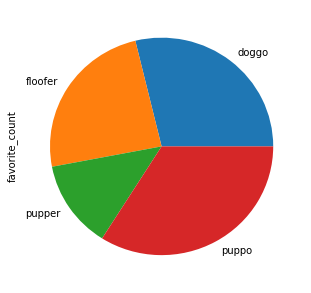

In [95]:
adjusted_metrics_by_stage.favorite_count.plot(kind='pie', figsize=(5,5));

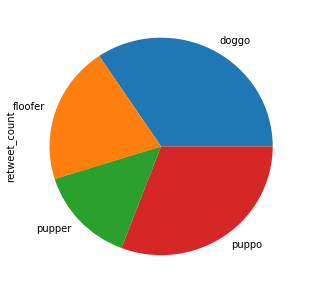

In [96]:
adjusted_metrics_by_stage.retweet_count.plot(kind='pie', figsize=(5,5));

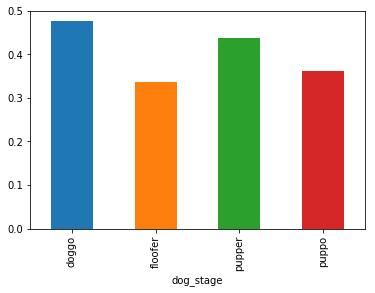

In [97]:
retweeted_to_favorited = adjusted_metrics_by_stage['retweet_count'] / adjusted_metrics_by_stage['favorite_count']
retweeted_to_favorited .plot(kind='bar');

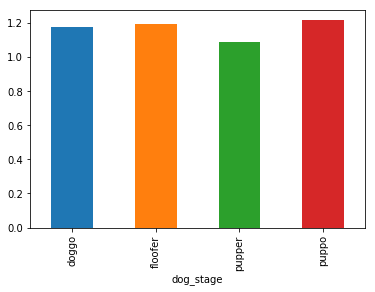

In [98]:
adjusted_metrics_by_stage.rating.plot(kind='bar');

Then I analyze breed for popularity and agreeability as well:

In [99]:
grouped_by_breed = df_tweets.groupby('dog_breed')

breed_density = grouped_by_breed.size()
metrics_by_breed = grouped_by_breed[['favorite_count', 'retweet_count', 'rating']].aggregate(pd.Series.sum)
adjusted_metrics_by_breed = metrics_by_breed.copy()

for breed in breed_density.index:
    for metric in metrics_by_breed:
        adjusted_metrics_by_breed[metric][breed] = metrics_by_breed[metric][breed] / breed_density[breed]

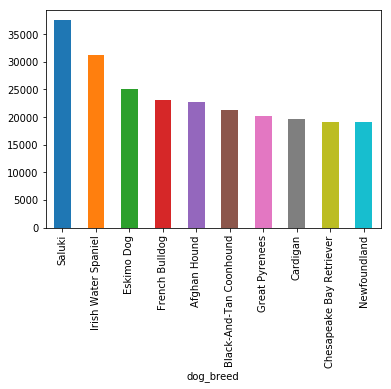

In [100]:
popularity_metric = adjusted_metrics_by_breed.favorite_count + adjusted_metrics_by_breed.retweet_count
popularity_metric.sort_values(ascending=False).head(10).plot(kind='bar');

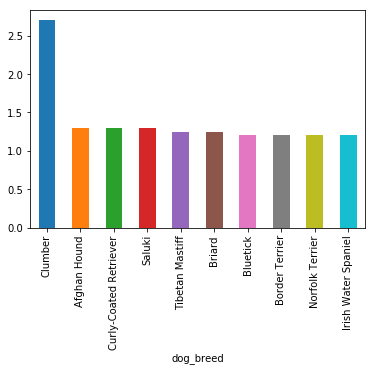

In [101]:
adjusted_metrics_by_breed.rating.sort_values(ascending=False).head(10).plot(kind='bar');

Then I look for the cutest breed in each stage:

In [102]:
grouped_by_both = df_tweets.groupby(['dog_stage','dog_breed'])
group_density = grouped_by_both.size()
group_score = group_density.copy().astype('float')
favorite_mean, retweet_mean, rating_mean = df_tweets.favorite_count.mean(), df_tweets.retweet_count.mean(), df_tweets.rating.mean()
for group,details in grouped_by_both:
    group_score[group] = (details.favorite_count.sum()/favorite_mean + details.retweet_count.sum()/retweet_mean + 0.5*details.rating.sum()/rating_mean) / group_density[group]

In [103]:
group_score

dog_stage  dog_breed                     
doggo      Beagle                             2.562694
           Borzoi                             2.133285
           Boxer                              3.116967
           Briard                             4.818959
           Chihuahua                         17.535753
           Cocker Spaniel                     2.362479
           Curly-Coated Retriever             2.967092
           Dalmatian                          1.780690
           Eskimo Dog                        26.239802
           German Shepherd                    4.268549
           German Short-Haired Pointer        0.997190
           Golden Retriever                   3.921048
           Great Pyrenees                     9.232257
           Irish Setter                       3.771070
           Komondor                           4.185241
           Labrador Retriever                11.709331
           Malamute                           2.619991
           Old English 

In [104]:
dog_stages = list(df_tweets.dog_stage.value_counts().index)
featured_dogs = dict()
for stage in dog_stages:
    top_breed = group_score[stage].sort_values(ascending=False).head(1).index.values[0]
    featured_dogs[(stage,top_breed)] = list(grouped_by_both.get_group((stage,top_breed)).text.values)

In [105]:
featured_dogs

{('pupper',
  'Chihuahua'): ['This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d', "This is Ambrose. He's an Alfalfa Ballyhoo. Draws pistol fast af. Pretty much runs the frontier. 11/10 lethal pupper https://t.co/ih6epBOxIA", "I promise this wasn't meant to be a cuteness overload account but ermergerd look at this cozy pupper. 13/10 https://t.co/mpQl2rJjDh"],
 ('doggo',
  'Eskimo Dog'): ["Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC"],
 ('puppo',
  'Rottweiler'): ["Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1"],
 ('floofer',
  'Samoyed'): ["Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744"]}

For the porposes of the article, I investigate further in this block what language each tweet, other than english ones,is written in.

In [106]:
for i in df_tweets[df_tweets.lang != 'en'].index:
    print( df_tweets.iloc[i]['lang'], ': ' , df_tweets.iloc[i]['text'])

und :  RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
in :  RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…
und :  @markhoppus 182/10
und :  @HistoryInPics 13/10
und :  #ImWithThor 13/10
https://t.co/a18mzkhTf6
in :  Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7
eu :  Duuun dun... duuun dun... dunn  dun. dunn dun. dun dun dun dun dun dun dun dun dun dun dun dun dun dun dun. 10/10 https://t.co/9qdJ2Q1Cwx
und :  @mount_alex3 13/10
es :  13/10 hero af
@ABC
und :  12/10 @LightningHoltt
nl :  aahhhhkslaldhwnxmzbbs 12/10 for being da smooshiest https://t.co/UOPdXmUz4H
in :  NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 https://t.co/Ny4iM6FDtz
nl :  ER... MER... GERD 13/10 https://t.co/L1puJISV1a
und :  13/10
@ABC7
tl :  12/10 good shit Bubka
@wane15
ro :  RT @dogratingrating: Unoriginal idea. Blatant plagiari